In [1]:
from math import *
import numpy as np
from matplotlib import pyplot as plt
# plt.rcParams['figure.figsize'] = [12,6]
# plt.style.use('seaborn-dark')

# Carbon price resolution

## Theory

In carbon we specify prices $P$ using the parameter $B$ with

$$
B = \sqrt{P}
$$

$B$ is stored as a 64-bit integer, divided by $2^{32}$, which is $4.3$bn or $10^{10}$

In [2]:
2**32, log10(2**32)

(4294967296, 9.632959861247398)

We are ultimately interested in the precision $\Delta P/P$. We start with

$$
\Delta B = 2^{-32} \simeq 10^{-10}
$$

and therefore 

$$
\frac{\Delta B}B = \frac{2^{-32}}B \simeq \frac{10^{-10}}B
$$

Moreover easy calculation using $\Delta P= (B+\Delta B)^2-B^2$ yields

$$
\frac{\Delta P}P = \frac{2\cdot 2^{-32}}{\sqrt P} \simeq \frac{2\cdot 10^{-10}}{\sqrt P}
$$

## Charts

In [3]:
p_r = np.array([10**x for x in np.linspace(-25,10,100)])
delp_p_r =  np.array([2**-31/sqrt(p) for p in p_r])

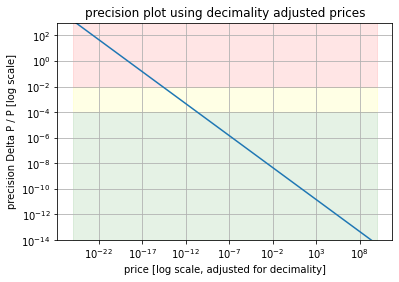

In [4]:
gs, ys, rs, e = 10**(-15), 10**(-4), 10**(-2), 10**15
plt.plot(p_r, delp_p_r)
plt.fill_between(p_r, rs, e, color="red", alpha=0.1)
plt.fill_between(p_r, ys, rs, color="yellow", alpha=0.1)
plt.fill_between(p_r, gs, ys, color="green", alpha=0.1)
plt.xscale("log")
plt.xlabel("price [log scale, adjusted for decimality]")
plt.yscale("log")
plt.ylabel("precision Delta P / P [log scale]")
plt.title("precision plot using decimality adjusted prices")
plt.ylim(10**(-14), 10**3)
plt.grid()

In [5]:
p_r2 = np.array([10**x for x in np.linspace(-5,5,100)])
delp_p_18_r =  np.array([2**-31/sqrt(p*10**(-18+6)) for p in p_r])
delp_p_24_r =  np.array([2**-31/sqrt(p*10**(-24+6)) for p in p_r])

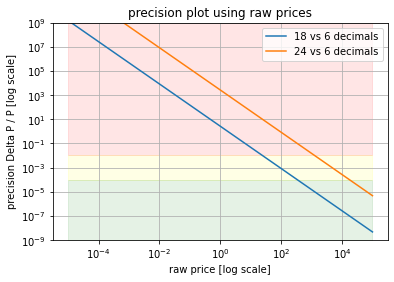

In [6]:
gs, ys, rs, e = 10**(-12), 10**(-4), 10**(-2), 10**10
plt.plot(p_r2, delp_p_18_r, label="18 vs 6 decimals")
plt.plot(p_r2, delp_p_24_r, label="24 vs 6 decimals")
plt.fill_between(p_r2, rs, e, color="red", alpha=0.1)
plt.fill_between(p_r2, ys, rs, color="yellow", alpha=0.1)
plt.fill_between(p_r2, gs, ys, color="green", alpha=0.1)
plt.xscale("log")
plt.xlabel("raw price [log scale]")
plt.yscale("log")
plt.ylabel("precision Delta P / P [log scale]")
plt.title("precision plot using raw prices")
plt.ylim(10**(-9), 10**9)
plt.legend()
plt.grid()
plt.savefig("precision.png")

## Tables

### First prices

In [7]:
dhi, dlo, bminexp = 18, 6, 32
bmin =  2**(-bminexp)
first_prices = [(i, (bmin*i)**2 * 10**(dhi-dlo)) for i in range(1,100)]
increments = [(b[0],b[1]/a[1]-1) for a,b in tuple(zip(first_prices, first_prices[1:]))]
print(f"  First prices at {dhi} vs {dlo} dec [diff {dhi-dlo}]")
print("-----------------------------------------")
print("  #       Price         (log)   %Chg next")
print("-----------------------------------------")
for p,i in tuple(zip(first_prices, increments))[:25]:
    print(f"{p[0]:3}:  {p[1]:14.10f}    ({abs(log10(p[1])):2.1f})     {i[1]*100:5.1f}%")

  First prices at 18 vs 6 dec [diff 12]
-----------------------------------------
  #       Price         (log)   %Chg next
-----------------------------------------
  1:    0.0000000542    (7.3)     300.0%
  2:    0.0000002168    (6.7)     125.0%
  3:    0.0000004879    (6.3)      77.8%
  4:    0.0000008674    (6.1)      56.2%
  5:    0.0000013553    (5.9)      44.0%
  6:    0.0000019516    (5.7)      36.1%
  7:    0.0000026563    (5.6)      30.6%
  8:    0.0000034694    (5.5)      26.6%
  9:    0.0000043910    (5.4)      23.5%
 10:    0.0000054210    (5.3)      21.0%
 11:    0.0000065594    (5.2)      19.0%
 12:    0.0000078063    (5.1)      17.4%
 13:    0.0000091615    (5.0)      16.0%
 14:    0.0000106252    (5.0)      14.8%
 15:    0.0000121973    (4.9)      13.8%
 16:    0.0000138778    (4.9)      12.9%
 17:    0.0000156667    (4.8)      12.1%
 18:    0.0000175641    (4.8)      11.4%
 19:    0.0000195698    (4.7)      10.8%
 20:    0.0000216840    (4.7)      10.3%
 21:    0.0000

In [8]:
dhi, dlo, bminexp = 24, 6, 32
bmin =  2**(-bminexp)
first_prices = [(i, (bmin*i)**2 * 10**(dhi-dlo)) for i in range(1,100)]
increments = [(b[0],b[1]/a[1]-1) for a,b in tuple(zip(first_prices, first_prices[1:]))]
print(f"  First prices at {dhi} vs {dlo} dec [diff {dhi-dlo}]")
print("-----------------------------------------")
print("  #       Price         (log)   %Chg next")
print("-----------------------------------------")
for p,i in tuple(zip(first_prices, increments))[:25]:
    print(f"{p[0]:3}:  {p[1]:14.10f}    ({abs(log10(p[1])):2.1f})     {i[1]*100:5.1f}%")

  First prices at 24 vs 6 dec [diff 18]
-----------------------------------------
  #       Price         (log)   %Chg next
-----------------------------------------
  1:    0.0542101086    (1.3)     300.0%
  2:    0.2168404345    (0.7)     125.0%
  3:    0.4878909776    (0.3)      77.8%
  4:    0.8673617380    (0.1)      56.2%
  5:    1.3552527156    (0.1)      44.0%
  6:    1.9515639105    (0.3)      36.1%
  7:    2.6562953226    (0.4)      30.6%
  8:    3.4694469520    (0.5)      26.6%
  9:    4.3910187986    (0.6)      23.5%
 10:    5.4210108624    (0.7)      21.0%
 11:    6.5594231435    (0.8)      19.0%
 12:    7.8062556419    (0.9)      17.4%
 13:    9.1615083575    (1.0)      16.0%
 14:   10.6251812904    (1.0)      14.8%
 15:   12.1972744405    (1.1)      13.8%
 16:   13.8777878078    (1.1)      12.9%
 17:   15.6667213924    (1.2)      12.1%
 18:   17.5640751943    (1.2)      11.4%
 19:   19.5698492134    (1.3)      10.8%
 20:   21.6840434497    (1.3)      10.3%
 21:   23.9066

### Last prices

In [9]:
dhi, dlo = 18,6
first_prices = [(i, (2**32-bmin*i)**2 * 10**(dhi-dlo)) for i in range(1,100)]
increments = [(b[0],b[1]/a[1]-1) for a,b in tuple(zip(first_prices, first_prices[1:]))]
print(f"  Last prices at {dhi} vs {dlo} dec [diff {dhi-dlo}]")
print("-----------------------------------------")
print("  #    Price     (log)     %Chg next")
print("-----------------------------------------")
for p,i in tuple(zip(first_prices, increments))[:25]:
    print(f"{p[0]:3}:  {p[1]:6.1e}    ({abs(log10(p[1])):2.1f})    {i[1]*100:5.10f}%")

  Last prices at 18 vs 6 dec [diff 12]
-----------------------------------------
  #    Price     (log)     %Chg next
-----------------------------------------
  1:  1.8e+31    (31.3)    0.0000000000%
  2:  1.8e+31    (31.3)    0.0000000000%
  3:  1.8e+31    (31.3)    0.0000000000%
  4:  1.8e+31    (31.3)    0.0000000000%
  5:  1.8e+31    (31.3)    0.0000000000%
  6:  1.8e+31    (31.3)    0.0000000000%
  7:  1.8e+31    (31.3)    0.0000000000%
  8:  1.8e+31    (31.3)    0.0000000000%
  9:  1.8e+31    (31.3)    0.0000000000%
 10:  1.8e+31    (31.3)    0.0000000000%
 11:  1.8e+31    (31.3)    0.0000000000%
 12:  1.8e+31    (31.3)    0.0000000000%
 13:  1.8e+31    (31.3)    0.0000000000%
 14:  1.8e+31    (31.3)    0.0000000000%
 15:  1.8e+31    (31.3)    0.0000000000%
 16:  1.8e+31    (31.3)    0.0000000000%
 17:  1.8e+31    (31.3)    0.0000000000%
 18:  1.8e+31    (31.3)    0.0000000000%
 19:  1.8e+31    (31.3)    0.0000000000%
 20:  1.8e+31    (31.3)    0.0000000000%
 21:  1.8e+31    (31

### Different bmin

In [10]:
dhi, dlo, bminexp = 18, 6, 40
bmin =  2**(-bminexp)
first_prices = [(i, (bmin*i)**2 * 10**(dhi-dlo)) for i in range(1,1000)]
increments = [(b[0],b[1]/a[1]-1) for a,b in tuple(zip(first_prices, first_prices[1:]))]
print(f"  First prices @ {dhi} vs {dlo} decs [{dhi-dlo}]; bexp={bminexp}")
print("---------------------------------------------------")
print("  #              Price            (log)   %chg next")
print("---------------------------------------------------")
for p,i in tuple(zip(first_prices, increments))[:25]:
    print(f"{p[0]:3}: {p[1]:25.20f}    ({abs(log10(p[1])):4.1f})   {i[1]*100:5.1f}%")

  First prices @ 18 vs 6 decs [12]; bexp=40
---------------------------------------------------
  #              Price            (log)   %chg next
---------------------------------------------------
  1:    0.00000000000082718061    (12.1)   300.0%
  2:    0.00000000000330872245    (11.5)   125.0%
  3:    0.00000000000744462551    (11.1)    77.8%
  4:    0.00000000001323488980    (10.9)    56.2%
  5:    0.00000000002067951531    (10.7)    44.0%
  6:    0.00000000002977850205    (10.5)    36.1%
  7:    0.00000000004053185002    (10.4)    30.6%
  8:    0.00000000005293955920    (10.3)    26.6%
  9:    0.00000000006700162962    (10.2)    23.5%
 10:    0.00000000008271806126    (10.1)    21.0%
 11:    0.00000000010008885412    (10.0)    19.0%
 12:    0.00000000011911400821    ( 9.9)    17.4%
 13:    0.00000000013979352352    ( 9.9)    16.0%
 14:    0.00000000016212740006    ( 9.8)    14.8%
 15:    0.00000000018611563782    ( 9.7)    13.8%
 16:    0.00000000021175823681    ( 9.7)    12.9%


## Increment plot

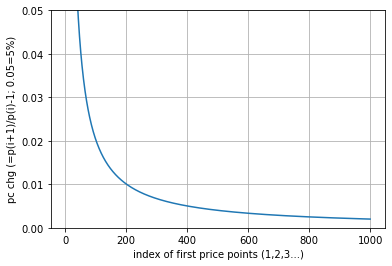

In [11]:
cumincr = np.cumprod(1+np.array(tuple(zip(*increments))[1]))
plt.plot(*zip(*increments))
plt.ylim(0,0.05)
plt.xlabel("index of first price points (1,2,3...)")
plt.ylabel("pc chg (=p(i+1)/p(i)-1; 0.05=5%)")
plt.grid()

## Liquidity ranges

Liquidity in storage is $2^{128}$, which is about $10^{38}$. A token with 18 decimals still have a range of $10^{20}$, and one with 24 decimals $10^{14}$

In [12]:
2**128, log10(2**128)

(340282366920938463463374607431768211456, 38.53183944498959)

Assume we take $16$ bits off then we get $2^{112}$, which is about $10^{33}$. A token with 18 decimals still have a range of $10^{15}$, and one with 24 decimals $10^{9}$

In [13]:
2**112, log10(2**112)

(5192296858534827628530496329220096, 33.71535951436589)

## Width vs position

In [65]:
phi = 0.05
def rg(al):
    return np.linspace(0,1,2**al+1)
def ccr(cr, wr):
    return np.array([[c-phi*w, c+phi*w] for c in cr for w in wr])

In [54]:
rg(0)

array([0., 1.])

In [55]:
data = ccr(rg(0), rg(2))

In [56]:
h0, a0, b0 = 0, 1, 0
dhmax = 5
for dh in range(dhmax+1):

SyntaxError: unexpected EOF while parsing (<ipython-input-56-f101450c87a6>, line 3)

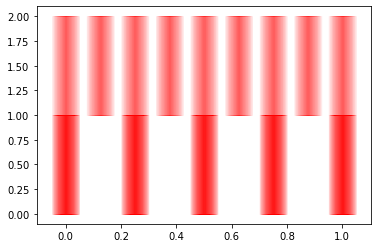

In [66]:
h0, a0, b0 = 0, 2, 3
dhmax = 4
for dh in range(dhmax//2):
    data = ccr(rg(a0+h0+dh), rg(b0+h0+dhmax-dh))
    for rr in data:
        plt.fill_between(rr, h0+dh, h0+dh+1, color="red", alpha=0.01)

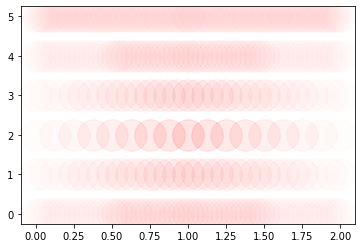

In [35]:
h0, a0, b0 = 0, 1, 0
dhmax = 5
for dh in range(dhmax+1):
    x = c(rg(a0+h0+dh), rg(b0+h0+dhmax-dh))
    y = [dh]*len(x)
    plt.scatter(x,y, color="red", s=1000, alpha=0.01)